<h1>K-Means Clustering</h1>

K-means clustering is an unsupervised maching learning algorithm used to partition a dataset into a K distint, non-overlapping subgroups based on the similarity of data points. The goal is to minimize the variance within each cluster and maximize the variance between clusters.

<h2>Choosing the number of Cluster K</h2>
Choosing the right number of clusters is crucial for effective clustering. One common method is Elbow Method

* Elbow method: Plot the sum of squared distance(intertia) for different values of K and look fo an "elbow point" where the inertia starts decreasing more slowly. The value of K at this point is considered optimal.

<h3>Silhouette Score</h3>
The Silhouette Score is a metric used to evaluate the quality of a clustering. It measures how similar an object is to own cluster(cohesion) compared to other clusters(separation), The silhouette score ranges from -1 to 1, where a higher value indicates better-defined clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

<h2>Load Data</h2>

In [2]:
df = pd.read_csv('data/Countries.csv')

In [4]:
df.sample(n=11)

,name,Longitude,Latitude
219,Tunisia,9.552884,34.119562
111,Siachen Glacier,77.180119,35.392363
113,Kenya,37.795940,0.599880
75,Gabon,11.788629,-0.586600
176,Dem. Rep. Korea,127.192480,40.153503
170,Peru,-74.382427,-9.152804
129,Lithuania,23.887194,55.326110
100,Br. Indian Ocean Ter.,72.445412,-7.330598
124,Libya,18.008662,27.030945
28,St-BarthÃ©lemy,-62.840678,17.898805


<h2>Plot Data</h2>

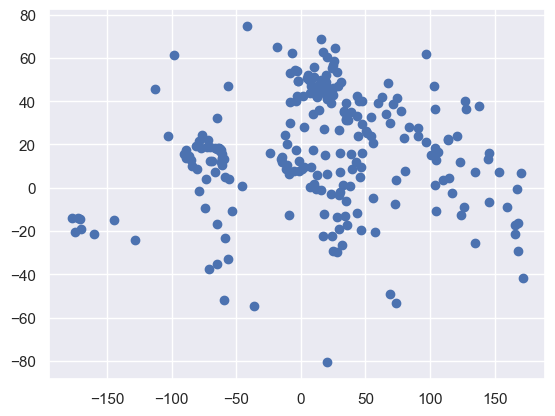

In [5]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.show()

<h2>Select Features</h2>

In [6]:
x = df.loc[:,['Longitude','Latitude']]
x.head()

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


<h2>Cluster</h2>
<h3>Assuming 2</h2>

In [7]:
km = KMeans(n_clusters=2)
km.fit(x)

KMeans(n_clusters=2)

<h3>Predict</h3>

In [8]:
cluster = km.predict(x)

In [9]:
df_cluster = df.copy()
df_cluster['Cluster'] = cluster
df_cluster.head()

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0


<h2>Visualize</h2>

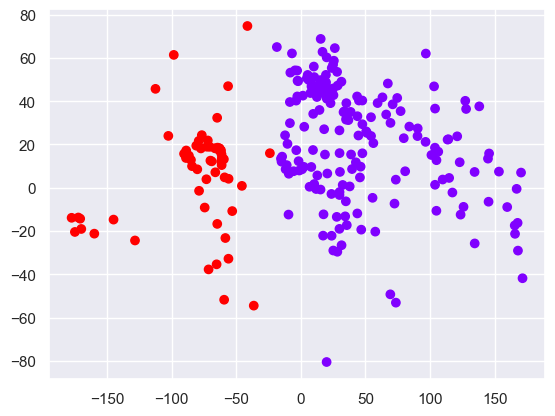

In [11]:
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()

<h2>Elbow Method to get proper number of clusters</h2>

In [12]:
wcss = []
for k in range (1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

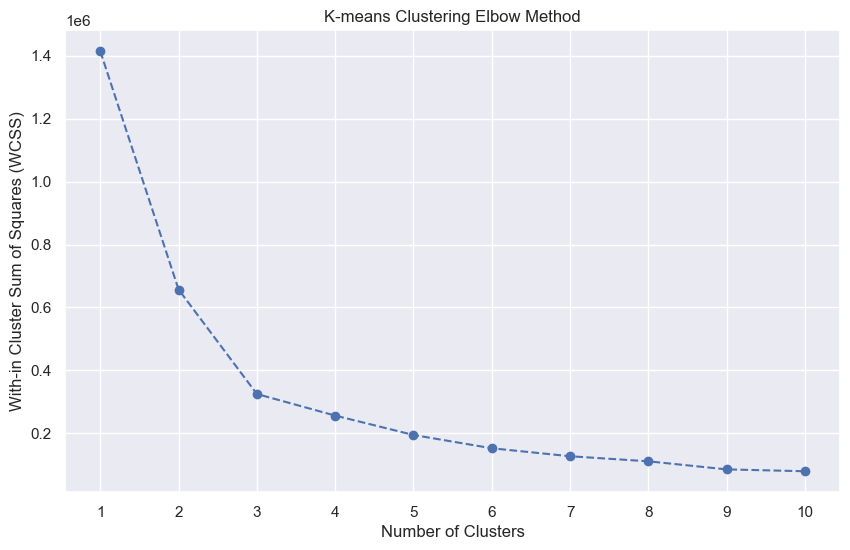

In [14]:
# Plot the elbow method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('With-in Cluster Sum of Squares (WCSS)')
plt.title('K-means Clustering Elbow Method')
plt.xticks(np.arange(1, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

<h2>Silhoutte</h2>

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(x, labels))

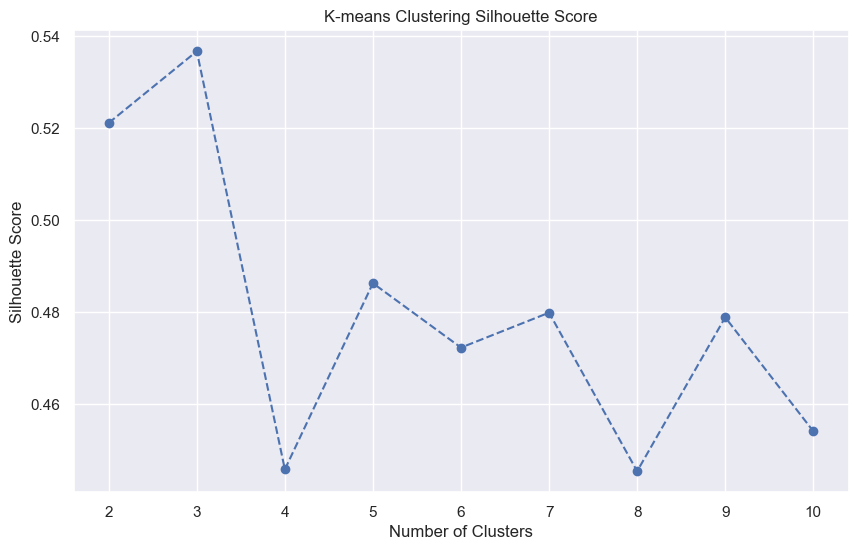

In [17]:
# Plot the silhouette scores
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering Silhouette Score')
plt.xticks(np.arange(2, 11, 1))  # Set ticks for x-axis
plt.grid(True)
plt.show()

In [23]:
km = KMeans(n_clusters=5)
km.fit(x)
clusters = km.predict(x)

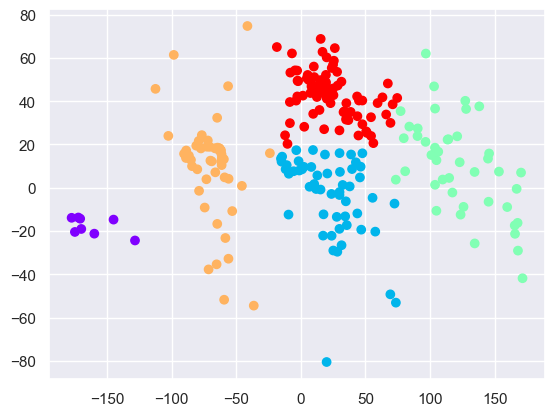

In [28]:
df_cluster = df.copy()
df_cluster['Cluster'] = clusters
plt.scatter(df['Longitude'],df['Latitude'],c=df_cluster['Cluster'],cmap='rainbow')
plt.show()